In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_pickle('anekdoty_archive.pkl')

In [5]:
df.head()

,rating,text
0,753,Следующим президентом США будет Буш-святой дух.
1,457,Когда в древнем Риме слишком часто сменялись и...
2,294,Стаpая бабка становится над паpнем в автобусе ...
3,266,"Следом за акцией ""Кликни Деда Мороза!"" компани..."
4,222,Встречаются два старых приятеля:- Ба! Какая вс...


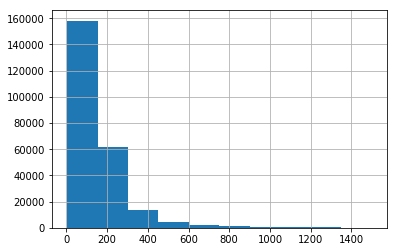

In [9]:
df[df.text.apply(len)<1500].text.apply(len).hist()

In [11]:
import pymorphy2
from nltk.tokenize import word_tokenize

In [12]:
class MorphProvider:
    def __init__(self):
        self.cache = {}
        self.morph = pymorphy2.MorphAnalyzer()
    
    def __call__(self, w):
        w = w.lower()
        cached = self.cache.get(w)
        if cached:
            return cached
        try:
            morphed = self.morph.parse(w)[0].normal_form
            self.cache[w] = morphed
            return morphed
        except:
            return None
    
    def morph_string(self, s):
        words = word_tokenize(s)
        return " ".join([self.__call__(w) for w in words])
    

In [13]:
morph = MorphProvider()

In [15]:
from tqdm import tqdm

In [17]:
df["normalized"] = [morph.morph_string(t) for t in tqdm(df.text)]


  2%|▏         | 5959/243713 [00:15<10:33, 375.02it/s]


  5%|▌         | 12808/243713 [00:32<09:46, 393.89it/s]


  9%|▉         | 21917/243713 [00:47<08:04, 457.98it/s]


 12%|█▏        | 28954/243713 [01:04<07:55, 451.91it/s]


 16%|█▌        | 38760/243713 [01:19<07:00, 487.26it/s]


 20%|█▉        | 48460/243713 [01:34<06:22, 510.56it/s]


 24%|██▍       | 57993/243713 [01:50<05:54, 524.02it/s]


 28%|██▊       | 67943/243713 [02:06<05:27, 536.32it/s]


 32%|███▏      | 79092/243713 [02:22<04:56, 554.61it/s]


 37%|███▋      | 90529/243713 [02:37<04:27, 573.10it/s]


 42%|████▏     | 102727/243713 [02:53<03:57, 593.24it/s]


 48%|████▊     | 116622/243713 [03:08<03:25, 619.73it/s]


 54%|█████▍    | 131204/243713 [03:22<02:54, 646.57it/s]


 60%|█████▉    | 146155/243713 [03:37<02:25, 671.51it/s]


 67%|██████▋   | 164035/243713 [03:52<01:52, 705.21it/s]


 77%|███████▋  | 186538/243713 [04:07<01:15, 754.88it/s]


 84%|████████▍ | 205630/243713 [04:23<00:48, 779.11it/s]


 94%|█████████▎| 228440/243713 [04:38<00:18, 819.45it/s]


100%|██████████| 243713/243713 [04:47<00:00, 847.47it/s]

In [18]:
df.to_pickle('anekdoty_archive.pkl')

In [19]:
df.head()

,rating,text,normalized
0,753,Следующим президентом США будет Буш-святой дух.,следующий президент сша быть буш-святой дух .
1,457,Когда в древнем Риме слишком часто сменялись и...,когда в древний рим слишком часто сменяться им...
2,294,Стаpая бабка становится над паpнем в автобусе ...,стаpий бабка становиться над паpнемой в автобу...
3,266,"Следом за акцией ""Кликни Деда Мороза!"" компани...",следом за акция `` кликнуть дед мороз ! '' ком...
4,222,Встречаются два старых приятеля:- Ба! Какая вс...,встречаться два старое приятель : - ба ! какой...


In [20]:
from collections import Counter

In [25]:
words = [w for w in " ".join(df.normalized).split() if len(w)>4]

In [26]:
Counter(words).most_common()[:20]

[('только', 16190),
 ('россия', 16040),
 ('когда', 15680),
 ('такой', 15636),
 ('человек', 14751),
 ('говорить', 13923),
 ('который', 13417),
 ('сказать', 11966),
 ('чтобы', 11459),
 ('почему', 11058),
 ('хотеть', 10362),
 ('какой', 10118),
 ('путин', 10049),
 ('хороший', 9744),
 ('после', 9654),
 ('самый', 9490),
 ('большой', 9420),
 ('новый', 9205),
 ('женщина', 9146),
 ('время', 8905)]

In [28]:
from wordcloud import WordCloud

def get_wordcloud(text,max_font_size=None):
    wordcloud = WordCloud(max_font_size=max_font_size).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")

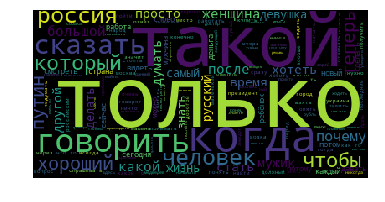

In [29]:
get_wordcloud(' '.join(words))